In [120]:
###############
### IMPORTS ###
###############

import random
from statistics import mean
import matplotlib.pyplot as plt

In [73]:
#################
### FUNCTIONS ###
#################

def initialization(n):
    sequence = random.sample(range(n),n)
    return sequence

def investigate(sequence,prisoner, guesses):
    count = 0
    ticket = sequence[prisoner]
    while ticket != prisoner:
        ticket = sequence[ticket]
        count += 1
    if count <= guesses:
        return (1,count)
    else:
        return (0,count)

def single(sequence,guesses):
    prisoners = set(range(len(sequence)))
    did_find_ticket = list()
    counts = list()
    while prisoners:
        prisoner = prisoners.pop()
        result = investigate(sequence,prisoner,guesses)
        did_find_ticket.append(result[0])
        counts.append(result[1])
    return did_find_ticket, counts

def many(runs,number_of_prisoners,guesses):
    hits = list()
    for i in range(runs):
        sequence = initialization(number_of_prisoners)
        did_find_ticket, counts = single(sequence,guesses)
        if did_find_ticket.count(1)/len(did_find_ticket) == 1:
            hits.append(1)
        else:
            hits.append(0)
    return(hits)

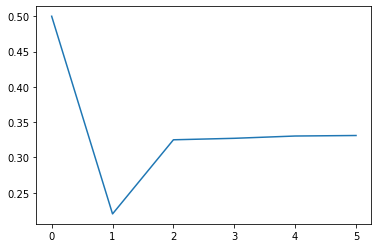

In [122]:
number_of_prisoners = 100
runs = 1000000
guesses = number_of_prisoners*0.5

percentages = list()
for run in [10,100,1000,10000,100000,1000000]:
    percentages.append(mean(many(run,number_of_prisoners,guesses)))
plt.plot(percentages);